In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
with open('CleanList.pickle','rb') as read_file:
    df_clean = pickle.load(read_file)

In [2]:
df_clean.head(5)

,RecommendationScore,ReviewNum,ItemNumber,Price,Brand,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,...,Senior,Treats,DryFood,WetFood,FreezeDried,FoodTopping,Dehydrated,AirDried,Frozen,BrandGroup
0,94.0,2676,108423,42.99,American Journey,32.0,14.0,10.0,5.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup2
1,95.0,295,100187,15.99,Moist & Meaty,18.0,7.0,33.0,3.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup4
2,96.0,854,46874,32.98,Blue Buffalo,26.0,15.0,10.0,4.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup1
3,100.0,19,183120,48.99,American Journey,30.0,9.0,10.0,9.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup2
4,95.0,3310,154551,48.99,Taste of the Wild,32.0,18.0,10.0,4.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup4


In [3]:
df = df_clean.copy()
del df['Brand']
del df['ItemNumber']
df = pd.get_dummies(df,drop_first=True)
df.columns

Index(['RecommendationScore', 'ReviewNum', 'Price', 'Protein_min', 'Fat_min',
       'Moisture_max', 'Fiber_max', 'Pet', 'Weight', 'PricePerPound', 'Adult',
       'PuppyOrKitten', 'Senior', 'Treats', 'DryFood', 'WetFood',
       'FreezeDried', 'FoodTopping', 'Dehydrated', 'AirDried', 'Frozen',
       'BrandGroup_BrandGroup2', 'BrandGroup_BrandGroup3',
       'BrandGroup_BrandGroup4'],
      dtype='object')

In [4]:
df.head(20)

,RecommendationScore,ReviewNum,Price,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,Weight,PricePerPound,...,DryFood,WetFood,FreezeDried,FoodTopping,Dehydrated,AirDried,Frozen,BrandGroup_BrandGroup2,BrandGroup_BrandGroup3,BrandGroup_BrandGroup4
0,94.0,2676,42.99,32.0,14.00,10.0,5.0,0,24.00,1.791250,...,1,0,0,0,0,0,0,1,0,0
1,95.0,295,15.99,18.0,7.00,33.0,3.0,0,13.50,1.184444,...,1,0,0,0,0,0,0,0,0,1
2,96.0,854,32.98,26.0,15.00,10.0,4.0,0,15.00,2.198667,...,1,0,0,0,0,0,0,0,0,0
3,100.0,19,48.99,30.0,9.00,10.0,9.0,0,24.00,2.041250,...,1,0,0,0,0,0,0,1,0,0
4,95.0,3310,48.99,32.0,18.00,10.0,4.0,0,NaN,2.726818,...,1,0,0,0,0,0,0,0,0,1
5,92.0,594,39.99,24.0,13.00,12.0,5.0,0,40.00,0.999750,...,1,0,0,0,0,0,0,0,0,1
6,96.0,2155,49.98,24.0,14.00,10.0,5.0,0,30.00,1.666000,...,1,0,0,0,0,0,0,0,0,0
7,95.0,456,21.83,21.0,10.00,12.0,4.0,0,33.00,0.661515,...,1,0,0,0,0,0,0,0,1,0
8,93.0,1306,43.99,26.0,14.00,10.0,4.0,0,40.00,1.099750,...,1,0,0,0,0,0,0,1,0,0
9,100.0,8,96.34,32.0,32.00,10.0,3.0,0,44.00,2.189545,...,1,0,0,0,0,0,0,0,0,1


In [5]:
df.describe()

,RecommendationScore,ReviewNum,Price,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,Weight,PricePerPound,...,DryFood,WetFood,FreezeDried,FoodTopping,Dehydrated,AirDried,Frozen,BrandGroup_BrandGroup2,BrandGroup_BrandGroup3,BrandGroup_BrandGroup4
count,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,4442.000000,6256.000000,...,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000
mean,90.119885,96.077845,34.434207,20.072817,9.118925,47.743429,2.699948,0.419757,11.054859,11.486993,...,0.338875,0.518223,0.084239,0.073689,0.016784,0.004636,0.003037,0.265026,0.241528,0.284687
std,10.355581,165.558485,20.376354,14.674983,7.836158,35.286139,2.487630,0.493559,10.249858,23.917650,...,0.473365,0.499708,0.277768,0.261285,0.128471,0.067932,0.055030,0.441382,0.428044,0.451301
min,20.000000,1.000000,1.990000,0.000000,0.000000,0.100000,0.000000,0.000000,0.046875,0.459800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.000000,14.000000,18.990000,9.000000,4.000000,10.000000,1.000000,0.000000,3.500000,2.954091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,93.000000,42.000000,30.990000,12.000000,6.500000,78.000000,1.500000,0.000000,8.250000,5.156923,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97.000000,109.250000,44.990000,28.500000,14.000000,80.000000,4.000000,1.000000,15.975000,6.597818,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,100.000000,3310.000000,218.990000,90.000000,99.900000,100.000000,82.000000,1.000000,50.000000,328.754717,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


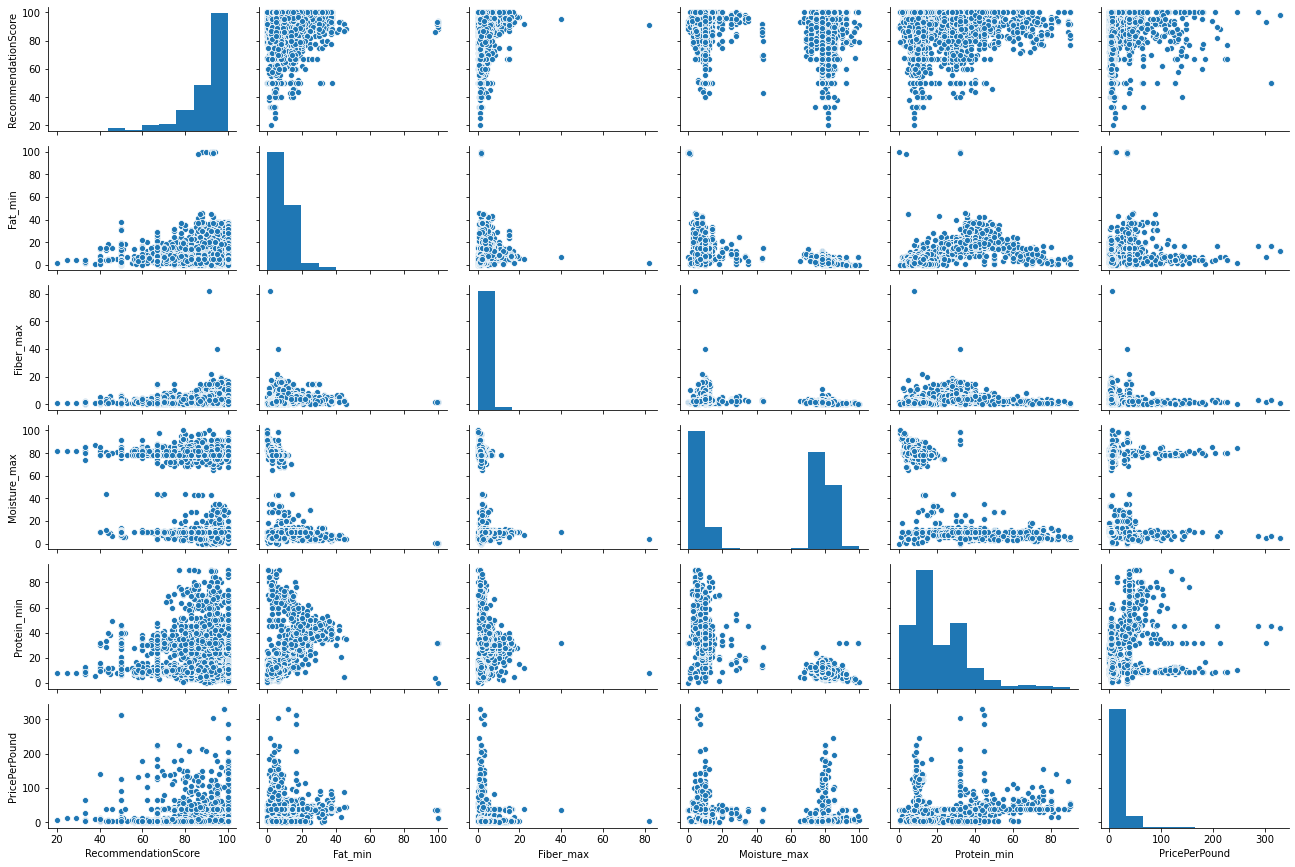

In [6]:
# Look at relationship between variables
clean_plot = df[['RecommendationScore','Fat_min','Fiber_max','Moisture_max','Protein_min','PricePerPound']]
sns.pairplot(clean_plot, height=2, aspect=1.5);

# Statsmodel

## Transform target variable

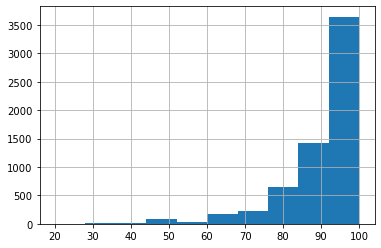

In [7]:
df.RecommendationScore.hist();

Data is highly skewed. Transform the target variable to get a more Gaussian-like distribution for better model performance.

In [8]:
# boxcox transformation
from scipy.stats import boxcox

y_t, _lambda = boxcox(df.RecommendationScore)

_lambda

6.158874621332958

Lambda: 6.884986592420364


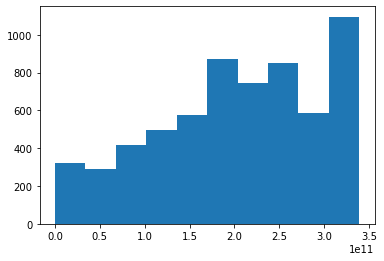

In [9]:
import scipy.stats as stats
lamb=stats.boxcox_normmax(df.RecommendationScore, brack=(-1.9, 1.9)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
score=(np.power(df.RecommendationScore,6.16)-1)/6.16

df['transformed_score'] = score
plt.hist(score);

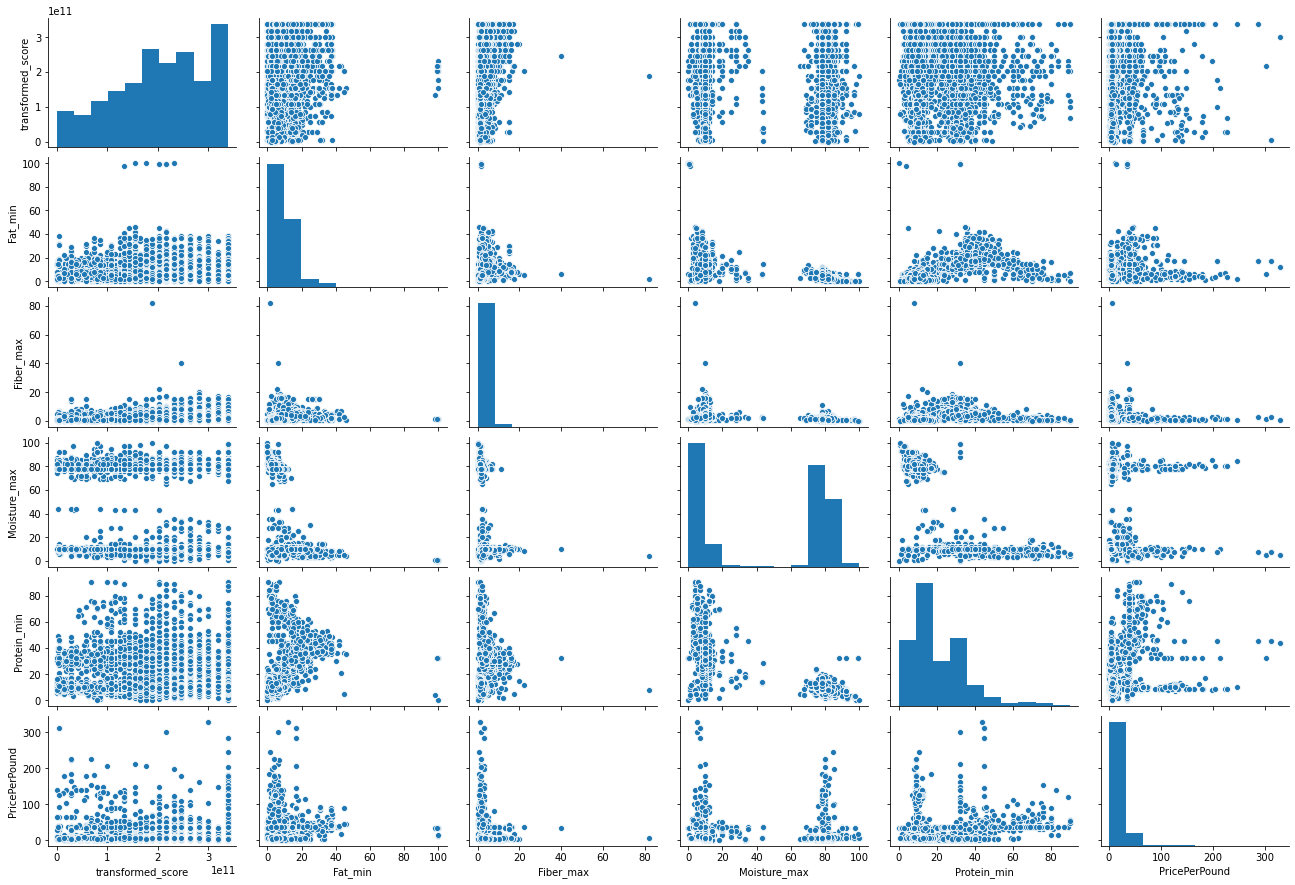

In [10]:
clean_plot = df[['transformed_score','Fat_min','Fiber_max','Moisture_max','Protein_min','PricePerPound']]
sns.pairplot(clean_plot, height=2, aspect=1.5);

## Linear regression with transformed score

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

y, X = patsy.dmatrices('transformed_score ~ Fat_min + Fiber_max + Moisture_max + Protein_min + Adult\
                       + PricePerPound + PuppyOrKitten + Senior + Treats + DryFood + WetFood\
                       + FreezeDried + FoodTopping + Dehydrated + AirDried + Frozen \
                       + Pet + BrandGroup_BrandGroup2 \
                       + BrandGroup_BrandGroup3 + BrandGroup_BrandGroup4', data=df, return_type="dataframe")

model = sm.OLS(y, X) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      transformed_score   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     55.86
Date:                Sun, 11 Oct 2020   Prob (F-statistic):          2.32e-205
Time:                        14:29:17   Log-Likelihood:            -1.6643e+05
No. Observations:                6256   AIC:                         3.329e+05
Df Residuals:                    6235   BIC:                         3.330e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.497e+11   1.27e+10     19.739      0.000    2.25e+11    2.75e+11
Fat_min                -9.828e+07   2.16e+08     -0.454      0.650   -5.23e+08    3.26e+08
Fiber_max               1.878e+07   5.86e+08      0.032      0.974   -1.13e+09    1.17e+09
Moisture_max            1.047e+08   1.43e+08      0.731      0.465   -1.76e+08    3.86e+08
Protein_min             9.325e+08   1.81e+08      5.160      0.000    5.78e+08    1.29e+09
Adult                  -4.041e+09   4.87e+09     -0.831      0.406   -1.36e+10     5.5e+09
PricePerPound           4.182e+06   5.43e+07      0.077      0.939   -1.02e+08    1.11e+08
PuppyOrKitten            9.84e+08   4.45e+09      0.221      0.825   -7.75e+09    9.71e+09
Senior                 -9.946e+09   4.62e+09     -2.153      0.031    -1.9e+10   -8.91e+08
Treats                 -1.557e+10   6.32e+09     -2.465      0.014    -2.8e+10   -3.19e+09
DryFood                 3.429e+09   7.52e+09      0.456      0.648   -1.13e+10    1.82e+10
WetFood                -9.015e+09   8.84e+09     -1.020      0.308   -2.63e+10    8.31e+09
FreezeDried             -2.58e+10    7.1e+09     -3.632      0.000   -3.97e+10   -1.19e+10
FoodTopping            -5.903e+09   6.13e+09     -0.963      0.336   -1.79e+10    6.12e+09
Dehydrated             -6.961e+10    1.1e+10     -6.335      0.000   -9.12e+10   -4.81e+10
AirDried                5.102e+10   1.75e+10      2.922      0.003    1.68e+10    8.52e+10
Frozen                  -8.32e+10   2.15e+10     -3.861      0.000   -1.25e+11    -4.1e+10
Pet                    -6.111e+10   2.43e+09    -25.141      0.000   -6.59e+10   -5.63e+10
BrandGroup_BrandGroup2 -2.749e+10   3.31e+09     -8.309      0.000    -3.4e+10    -2.1e+10
BrandGroup_BrandGroup3 -3.721e+10    3.4e+09    -10.947      0.000   -4.39e+10   -3.05e+10
BrandGroup_BrandGroup4 -3.596e+10   3.35e+09    -10.719      0.000   -4.25e+10   -2.94e+10
==============================================================================
Omnibus:                       97.413   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.835
Skew:                          -0.121   Prob(JB):                     8.34e-15
Kurtosis:                       2.564   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
df.head()

,RecommendationScore,ReviewNum,Price,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,Weight,PricePerPound,...,WetFood,FreezeDried,FoodTopping,Dehydrated,AirDried,Frozen,BrandGroup_BrandGroup2,BrandGroup_BrandGroup3,BrandGroup_BrandGroup4,transformed_score
0,94.0,2676,42.99,32.0,14.0,10.0,5.0,0,24.0,1.791250,...,0,0,0,0,0,0,1,0,0,2.316791e+11
1,95.0,295,15.99,18.0,7.0,33.0,3.0,0,13.5,1.184444,...,0,0,0,0,0,0,0,0,1,2.472844e+11
2,96.0,854,32.98,26.0,15.0,10.0,4.0,0,15.0,2.198667,...,0,0,0,0,0,0,0,0,0,2.637607e+11
3,100.0,19,48.99,30.0,9.0,10.0,9.0,0,24.0,2.041250,...,0,0,0,0,0,0,1,0,0,3.391714e+11
4,95.0,3310,48.99,32.0,18.0,10.0,4.0,0,NaN,2.726818,...,0,0,0,0,0,0,0,0,1,2.472844e+11


# Sklearn

In [13]:
# Get predictors and target variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold

df_model = df.copy()
df_model.drop('ReviewNum',axis = 1, inplace = True)
df_model.drop('Weight',axis = 1, inplace = True)
df_model.drop('Price',axis = 1, inplace = True)
df_model.drop('RecommendationScore',axis = 1, inplace = True)

X, y = df_model.drop('transformed_score',axis=1), df_model['transformed_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [14]:
# standardization

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

## Linear regression

In [15]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
# cross_val_score(lm, X_train, y_train, # estimator, features, target
#                 cv=5, # number of folds 
#                 scoring='r2')
print(np.mean(cross_val_score(lm, X_tr, y_train, cv=5, scoring='r2')))
lm.fit(X_tr, y_train)
print(f'Linear Regression test R^2: {lm.score(X_te, y_test):.3f}')

0.1434043209946691
Linear Regression test R^2: 0.147


In [16]:
df_model.describe()

,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,PricePerPound,Adult,PuppyOrKitten,Senior,Treats,...,WetFood,FreezeDried,FoodTopping,Dehydrated,AirDried,Frozen,BrandGroup_BrandGroup2,BrandGroup_BrandGroup3,BrandGroup_BrandGroup4,transformed_score
count,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,...,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6.256000e+03
mean,20.072817,9.118925,47.743429,2.699948,0.419757,11.486993,0.917999,0.112372,0.076407,0.063939,...,0.518223,0.084239,0.073689,0.016784,0.004636,0.003037,0.265026,0.241528,0.284687,2.078281e+11
std,14.674983,7.836158,35.286139,2.487630,0.493559,23.917650,0.274389,0.315849,0.265669,0.244663,...,0.499708,0.277768,0.261285,0.128471,0.067932,0.055030,0.441382,0.428044,0.451301,9.399034e+10
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.459800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.677892e+07
25%,9.000000,4.000000,10.000000,1.000000,0.000000,2.954091,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.438328e+11
50%,12.000000,6.500000,78.000000,1.500000,0.000000,5.156923,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.169073e+11
75%,28.500000,14.000000,80.000000,4.000000,1.000000,6.597818,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.811468e+11
max,90.000000,99.900000,100.000000,82.000000,1.000000,328.754717,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.391714e+11


## Lasso regression

We standardize the data before regularization

In [17]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [18]:
lasso_model.alpha_

100.0

In [19]:
lasso_model = Lasso(alpha = 100)
cross_val_score(lasso_model, X_tr, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2')

array([0.13274856, 0.14450268, 0.12995197, 0.16031491, 0.14950349])

In [20]:
print(np.mean(cross_val_score(lasso_model, X_tr, y_train, cv=5, scoring='r2')))
lasso_model.fit(X_tr, y_train)
print(f'Lasso Regression test R^2: {lasso_model.score(X_te, y_test):.3f}')

0.14340432123734256
Lasso Regression test R^2: 0.147


In [21]:
lasso_coef = pd.DataFrame(zip(X_train.columns, lasso_model.coef_),columns=["feature","coef"])
lasso_coef

,feature,coef
0,Protein_min,1.676894e+10
1,Fat_min,-7.471822e+08
2,Moisture_max,6.464994e+09
3,Fiber_max,-9.333090e+08
4,Pet,-2.977467e+10
5,PricePerPound,-1.413325e+09
6,Adult,-8.900432e+08
7,PuppyOrKitten,3.973569e+08
8,Senior,-2.428498e+09
9,Treats,-4.314709e+09


## Ridge regression

In [22]:
ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [23]:
ridge_model.alpha_

32.929712550971516

In [24]:
ridge_model = Ridge(alpha = 75.75)
cross_val_score(ridge_model, X_tr, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2')

array([0.1334195 , 0.14416949, 0.13084967, 0.16049089, 0.14802502])

In [25]:
print(np.mean(cross_val_score(ridge_model, X_tr, y_train, cv=5, scoring='r2')))
ridge_model.fit(X_tr, y_train)
print(f'Ridge Regression test R^2: {ridge_model.score(X_te, y_test):.4f}')

0.14339091127540265
Ridge Regression test R^2: 0.1489


In [26]:
lasso_coef = pd.DataFrame(zip(X_train.columns, ridge_model.coef_),columns=["feature","coef"])
lasso_coef

,feature,coef
0,Protein_min,1.445811e+10
1,Fat_min,-1.063757e+09
2,Moisture_max,3.188631e+09
3,Fiber_max,-1.093007e+09
4,Pet,-2.905039e+10
5,PricePerPound,-1.323041e+09
6,Adult,-1.003303e+09
7,PuppyOrKitten,3.636601e+08
8,Senior,-2.423124e+09
9,Treats,-3.728457e+09


## Random Forest

Linear regression is not performing well on my data. Maybe the data is not linear so we can try random forest.

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state = 42)

In [28]:
print(f'Random Forest cv score: {np.mean(cross_val_score(rf, X_tr, y_train,cv=5))}')

Random Forest cv score: 0.17777516749378028


In [29]:
rf.fit(X_tr, y_train)
print(f'Random Forest test score: {rf.score(X_te, y_test):.4f}')

Random Forest test score: 0.2183


In [30]:
importance = {'feature_names':X_train.columns, 'feature_importance':rf.feature_importances_}
importance_df = pd.DataFrame(importance)
importance_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

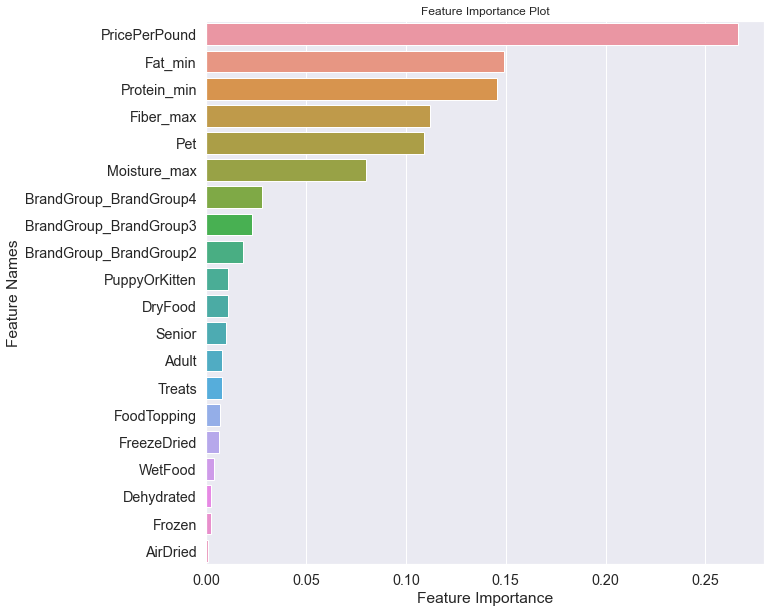

In [31]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,10))

with sns.color_palette("pastel"):
    sns.barplot(x=importance_df['feature_importance'], y=importance_df['feature_names']);
    sns.set(font = '20');

plt.title('Feature Importance Plot');
plt.xlabel('Feature Importance');
plt.ylabel('Feature Names');

# Visualizations with transformed data

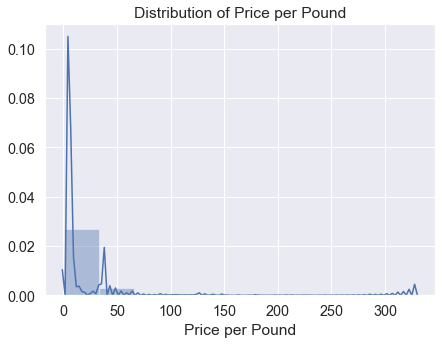

In [33]:
sns.set(font_scale=1.3)
plt.figure(figsize=(7,5))
sns.distplot(df_model['PricePerPound'],bins=10,norm_hist=True);
plt.xlabel('Price per Pound');
plt.title('Distribution of Price per Pound');

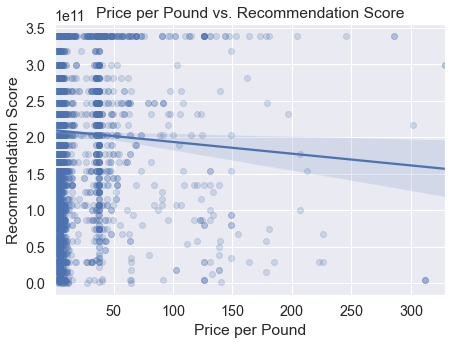

In [34]:
sns.set(font_scale=1.3)
plt.figure(figsize=(7,5))
sns.regplot(x="PricePerPound", y="transformed_score", data=df_model,scatter_kws={'alpha':0.2});
plt.xlabel('Price per Pound');
plt.ylabel('Recommendation Score');
plt.title('Price per Pound vs. Recommendation Score');

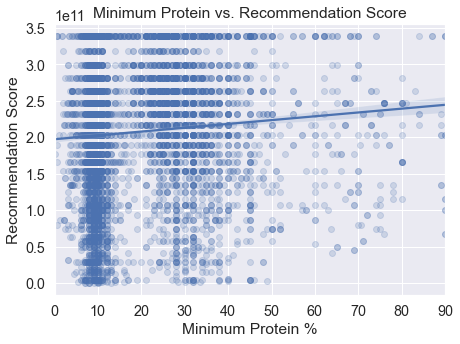

In [35]:
sns.set(font_scale=1.3)
plt.figure(figsize=(7,5))
sns.regplot(x="Protein_min", y="transformed_score", data=df_model,scatter_kws={'alpha':0.2});
plt.xlabel('Minimum Protein %');
plt.ylabel('Recommendation Score');
plt.title('Minimum Protein vs. Recommendation Score');

In [36]:
# for visualization purpose

df_clean_transform = df_clean.copy()


y_t, _lambda = boxcox(df_clean_transform.RecommendationScore)

_lambda

lamb=stats.boxcox_normmax(df_clean_transform.RecommendationScore, brack=(-1.9, 1.9)) 
print("Lambda:", lamb)
score=(np.power(df_clean_transform.RecommendationScore,6.16)-1)/6.16

df_clean_transform['transformed_score'] = score
df_clean_transform.columns

Lambda: 6.884986592420364


Index(['RecommendationScore', 'ReviewNum', 'ItemNumber', 'Price', 'Brand',
       'Protein_min', 'Fat_min', 'Moisture_max', 'Fiber_max', 'Pet', 'Weight',
       'PricePerPound', 'Adult', 'PuppyOrKitten', 'Senior', 'Treats',
       'DryFood', 'WetFood', 'FreezeDried', 'FoodTopping', 'Dehydrated',
       'AirDried', 'Frozen', 'BrandGroup', 'transformed_score'],
      dtype='object')

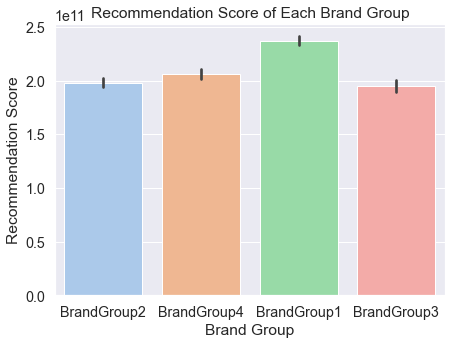

In [37]:
sns.set(font_scale=1.3)
plt.figure(figsize=(7,5))
with sns.color_palette("pastel"):
    score_brandgroup = df_clean_transform.groupby('BrandGroup')['transformed_score'].mean().reset_index()
    sns.barplot(x="BrandGroup", y="transformed_score", data=df_clean_transform)
plt.xlabel('Brand Group');
plt.ylabel('Recommendation Score');
plt.title('Recommendation Score of Each Brand Group');

In [38]:
food_type_dic = {
    'FoodType':['Treats','DryFood','WetFood','FreezeDried','FoodTopping','Dehydrated','AirDried','Frozen'],
    'Count': [df_model['Treats'].sum(),df_model['DryFood'].sum(),df_model['WetFood'].sum(),
    df_model['FreezeDried'].sum(),df_model['FoodTopping'].sum(),df_model['Dehydrated'].sum(),
    df_model['AirDried'].sum(),df_model['Frozen'].sum()]
}


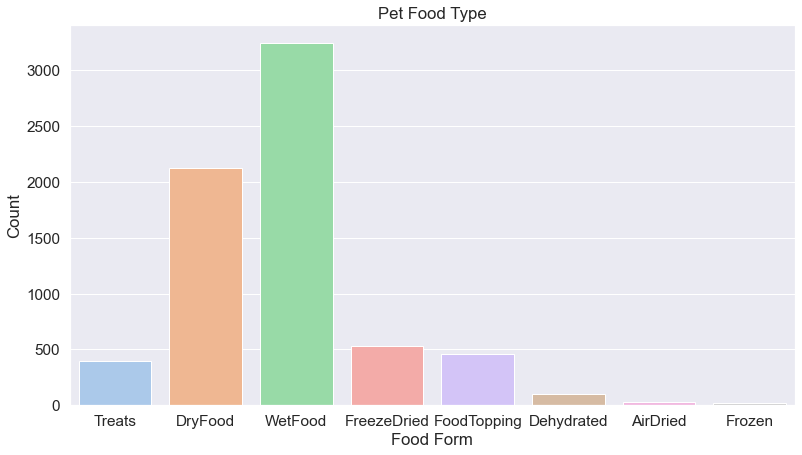

In [39]:
sns.set(font_scale=1.4)
plt.figure(figsize=(13,7))
with sns.color_palette("pastel"):
    sns.barplot(x='FoodType',y='Count',data=food_type_dic)
plt.xlabel('Food Form');
plt.ylabel('Count');
plt.title('Pet Food Type');

In [40]:
life_stage_dic = {
    'LifeStage':['Adult','Puppy/Kitten','Senior'],
    'Count': [df_model['Adult'].sum(),df_model['PuppyOrKitten'].sum(),df_model['Senior'].sum()]
}

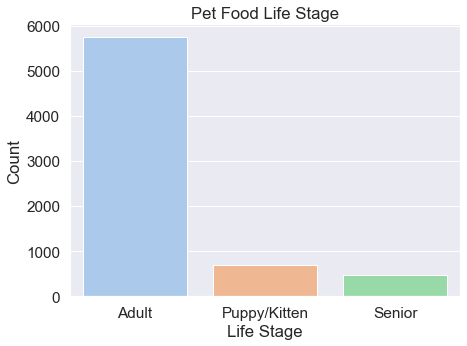

In [41]:
plt.figure(figsize=(7,5))
with sns.color_palette("pastel"):
    sns.barplot(x='LifeStage',y='Count',data=life_stage_dic)
plt.xlabel('Life Stage');
plt.ylabel('Count');
plt.title('Pet Food Life Stage');